# Pick two datasets: I chose the 2018 - 2017 Stack Overflow

In [884]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import plotly.express as px
from collections import Counter
%matplotlib inline

In [885]:
df_19 = pd.read_csv('survey_results_public19.csv')
df_18 = pd.read_csv('survey_results_public18.csv', low_memory=False)

In [886]:
df_19.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [887]:
df_18.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


# 2. Pose three questions about business or real-world applications

1. Which are the most used languages in 2019 and 2018? and whether they changed.


2. Where do the programmers come from? and whether it changed.


3. Are there more male, female or non-binary programmers? and whether it changed.

# 3. Create a Jupyter Notebook

## Question 1

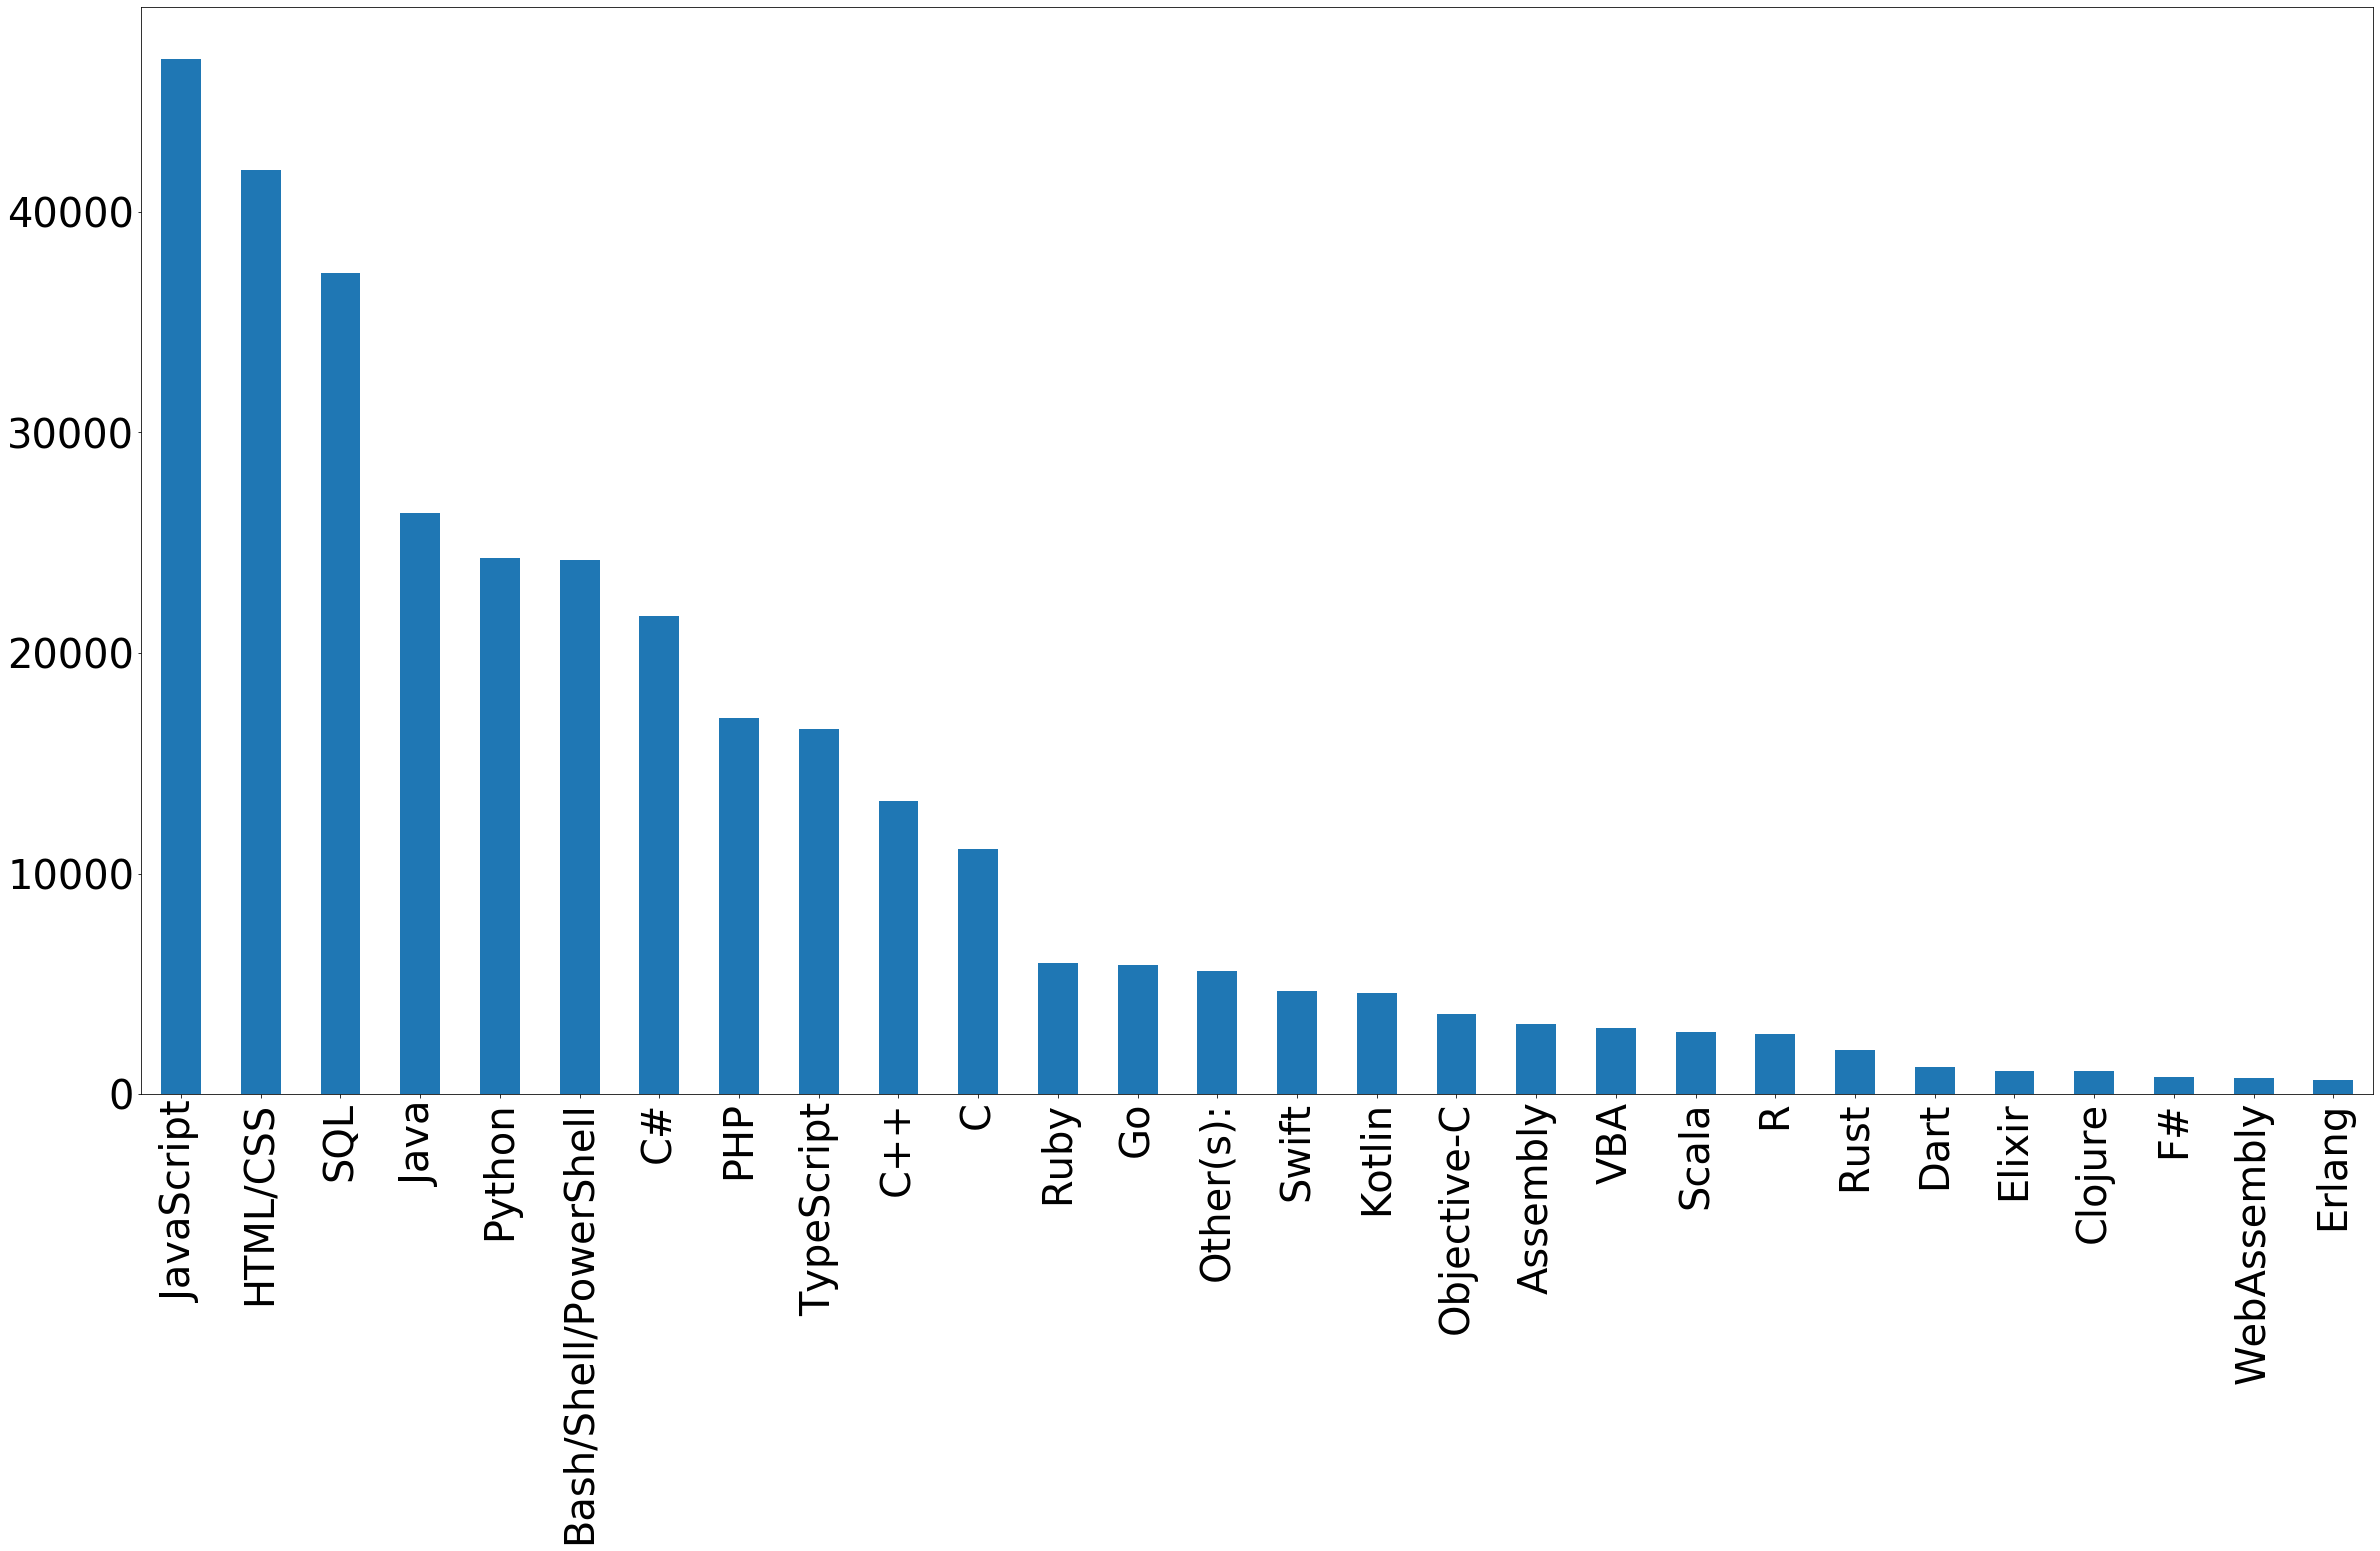

In [897]:
# Question 1 - Most frequent languages used by professionals in 2019
q1_19 = df_19[['MainBranch', 'LanguageWorkedWith']]
q1_19 = q1_19[q1_19.MainBranch == 'I am a developer by profession']
languages_19 = q1_19['LanguageWorkedWith'].str.split(';', expand = True).stack().value_counts()
q1_19x = languages_19.plot.bar(rot=0)
plt.rcParams['figure.figsize'] = [40, 20]
plt.xticks(rotation='vertical')
plt.rcParams.update({'font.size': 40})

## Evalutation 2019

The most used programming languages in 2019 were: JavaScript, HTML/CSS, SQL, Java, Python.

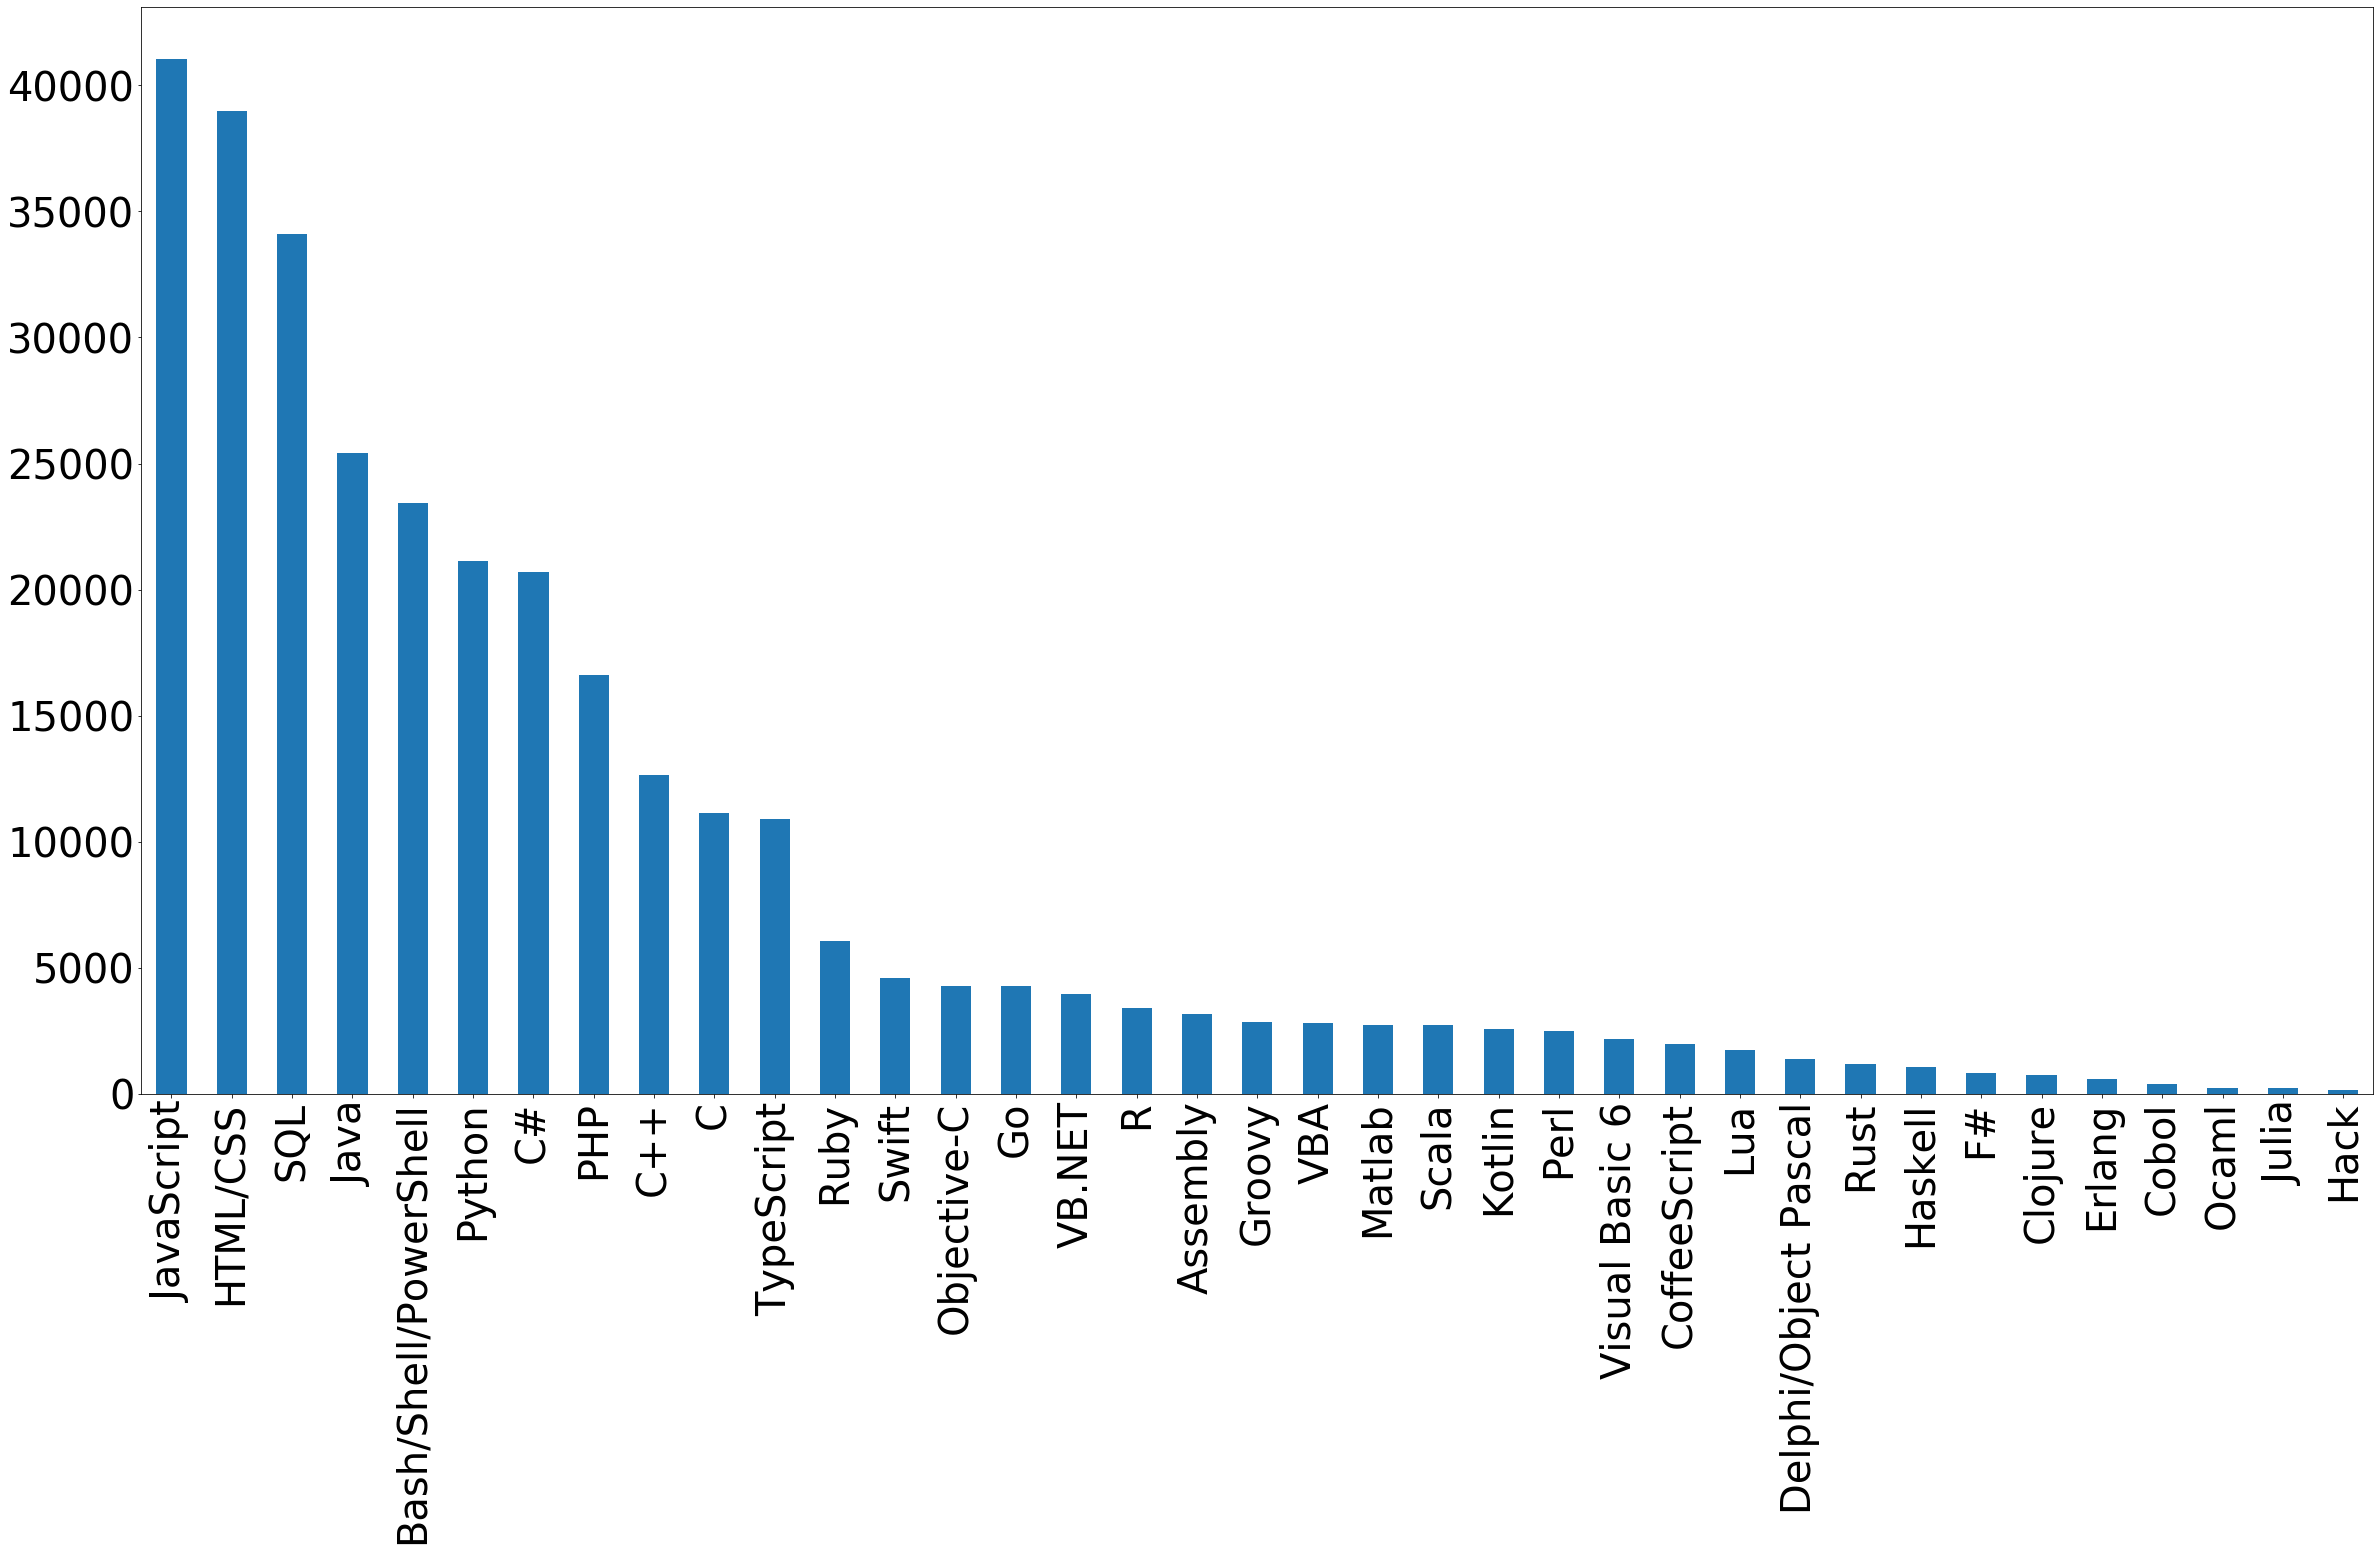

In [889]:
# Question 1 - Most frequent languages used by professionals in 2018
q1_18 = df_18[['Employment', 'LanguageWorkedWith']]
q1_18 = q1_18[q1_18.Employment == "Employed full-time"]
languages_18_df = pd.DataFrame(q1_18['LanguageWorkedWith'].str.split(';', expand = True).stack())
languages_18_df[0] = languages_18_df[0].replace({'HTML':'HTML/CSS', "Bash/Shell" : "Bash/Shell/PowerShell"})
languages_18_df = languages_18_df[languages_18_df[0] != "CSS"]
languages_18 = languages_18_df[0].value_counts()
bx = languages_18.plot.bar(rot=0)
plt.rcParams['figure.figsize'] = [40, 20]
plt.xticks(rotation='vertical')
plt.rcParams.update({'font.size': 40})

## Evalutation 2018

The most used programming languages in 2018 were: JavaScript, HTML/CSS, SQL, Java, Bash/Shell/PowerShell.

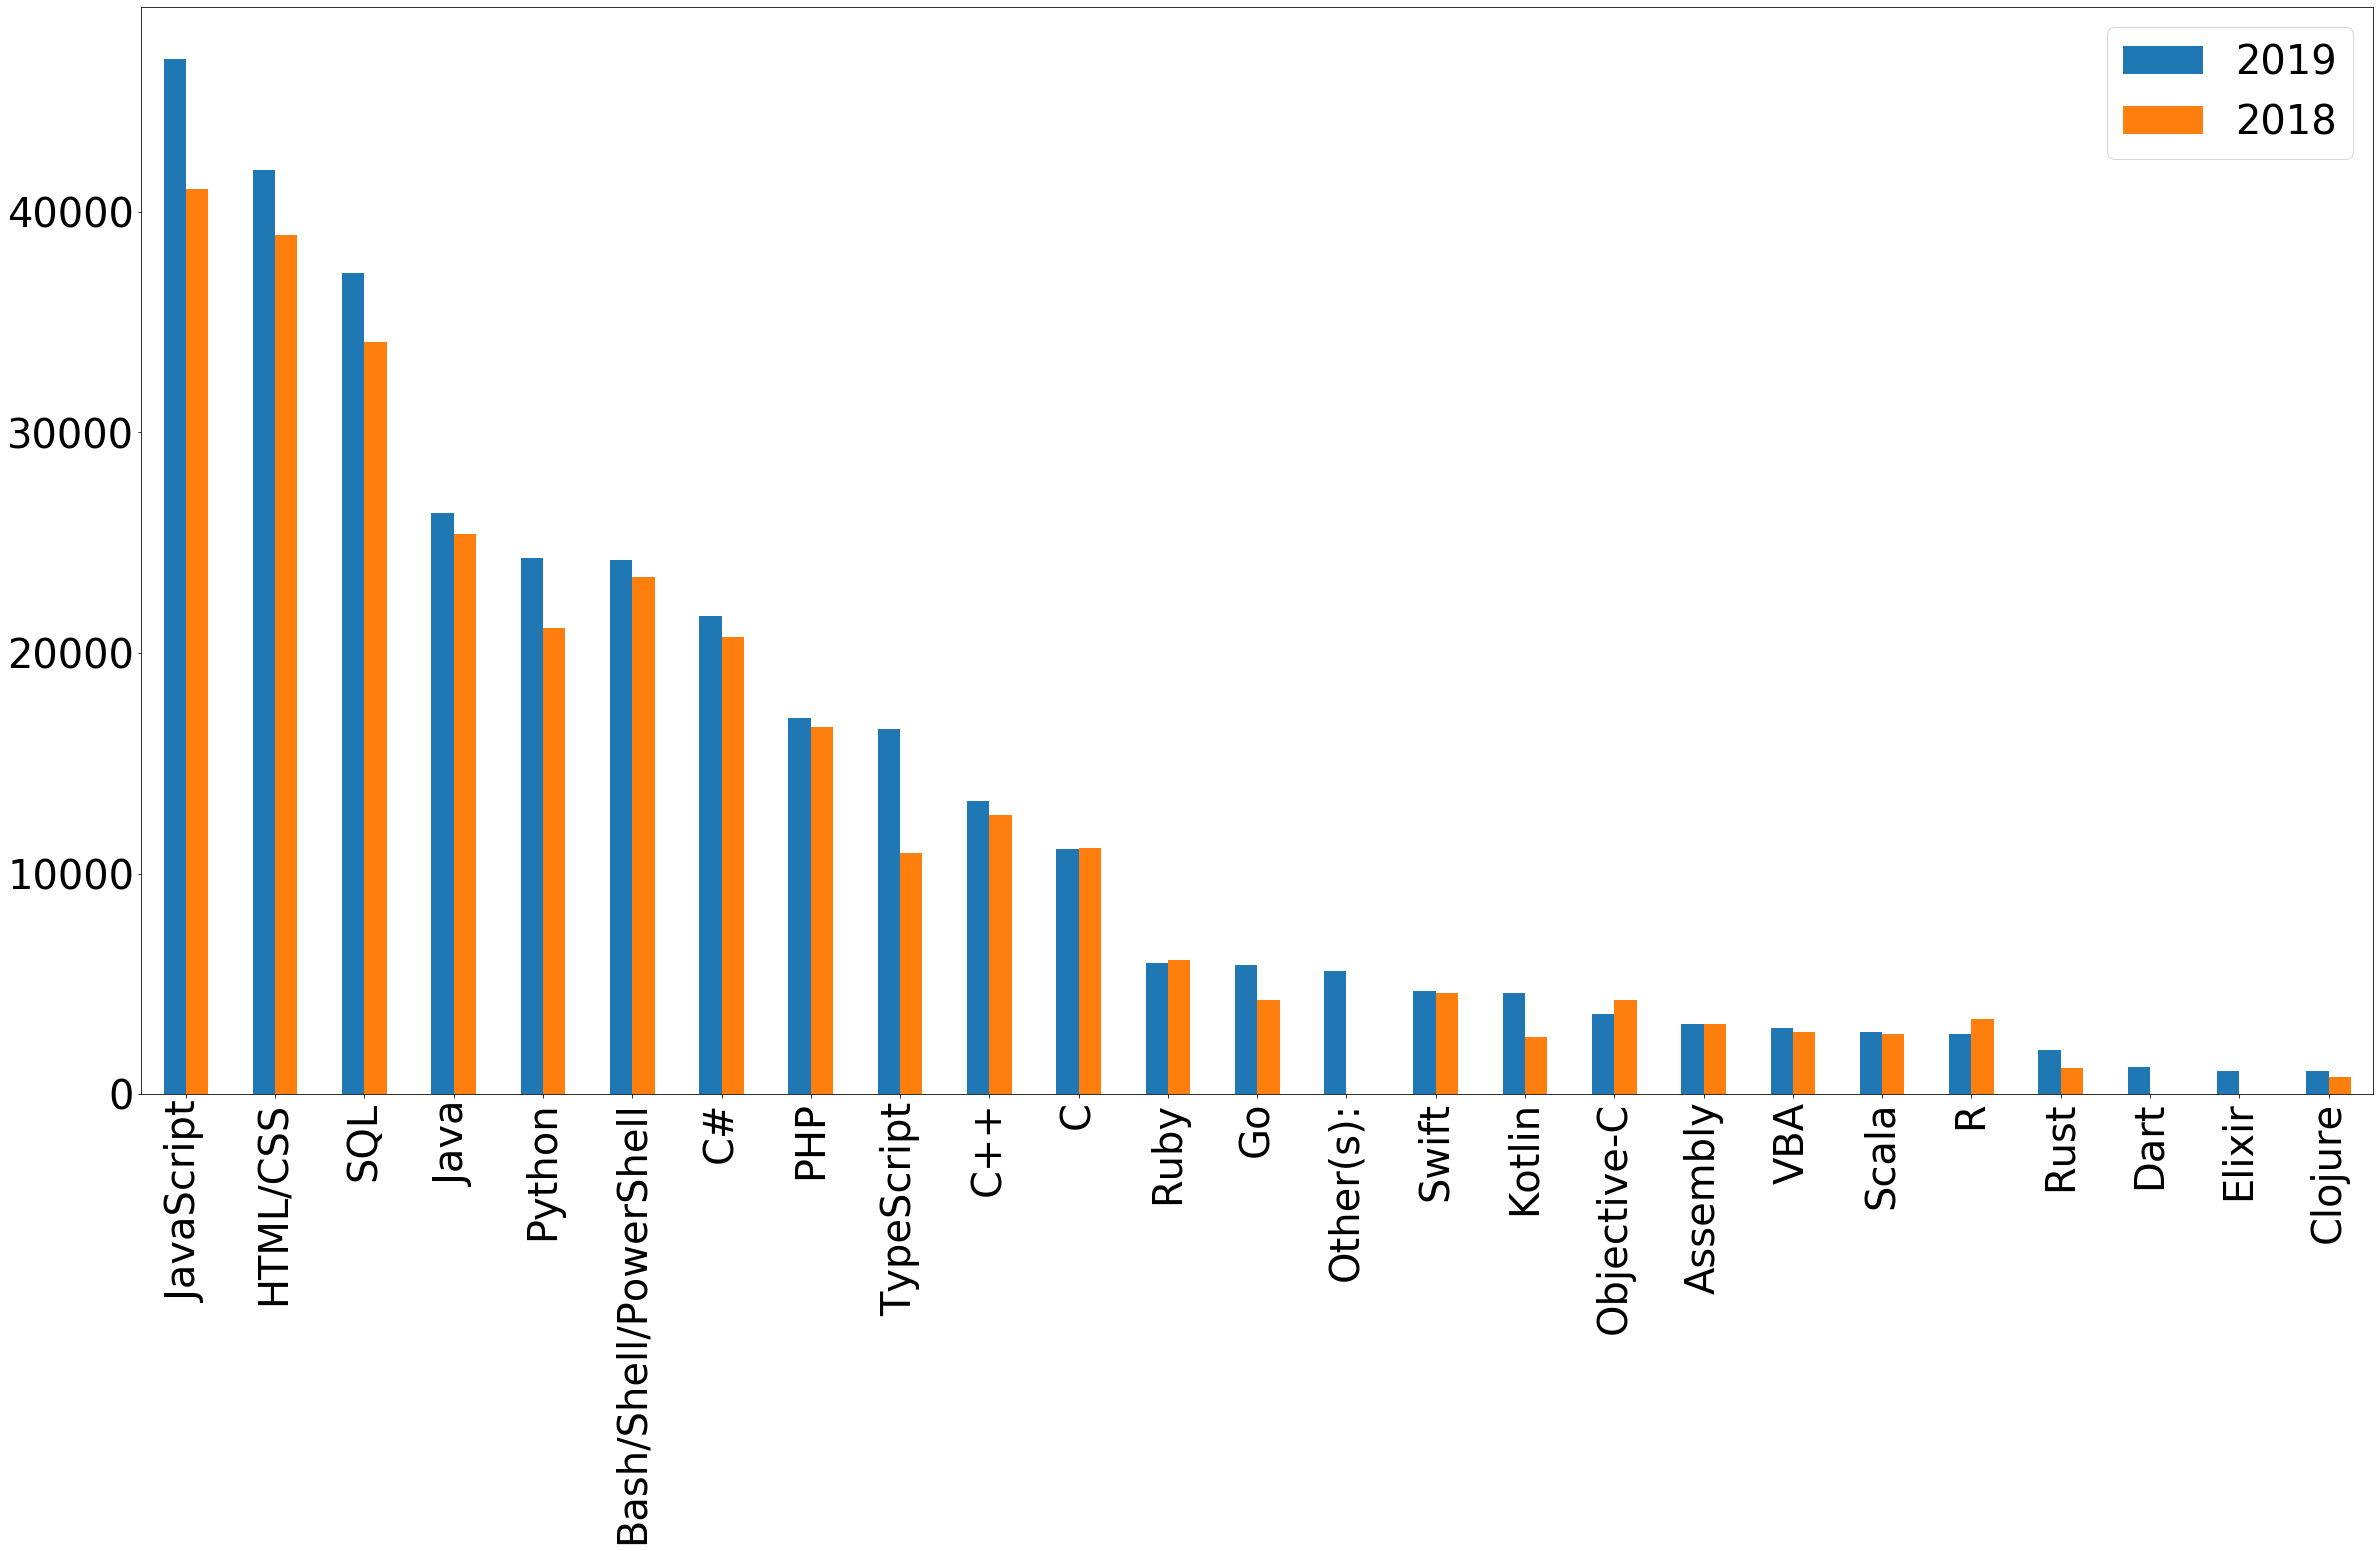

In [898]:
# Question 1 - Comparison between 2019 and 2018
languages_19 = q1_19['LanguageWorkedWith'].str.split(';', expand = True).stack().value_counts()    
df_comparison_langueges = pd.concat([languages_19.combine(languages_19,max).rename('2019').fillna(0), 
                           languages_18.combine(languages_18,max).rename('2018').fillna(0)], axis=1)[:25]
ax = df_comparison_langueges.plot.bar(rot=0)
plt.rcParams['figure.figsize'] = [40, 20]
plt.xticks(rotation='vertical')
plt.rcParams.update({'font.size': 40})

# Evalutation

Between 2019 and 2018, the four most used programming languages remained the same, but Python took Bash/Shell/PowerShell's place.



## Question 2

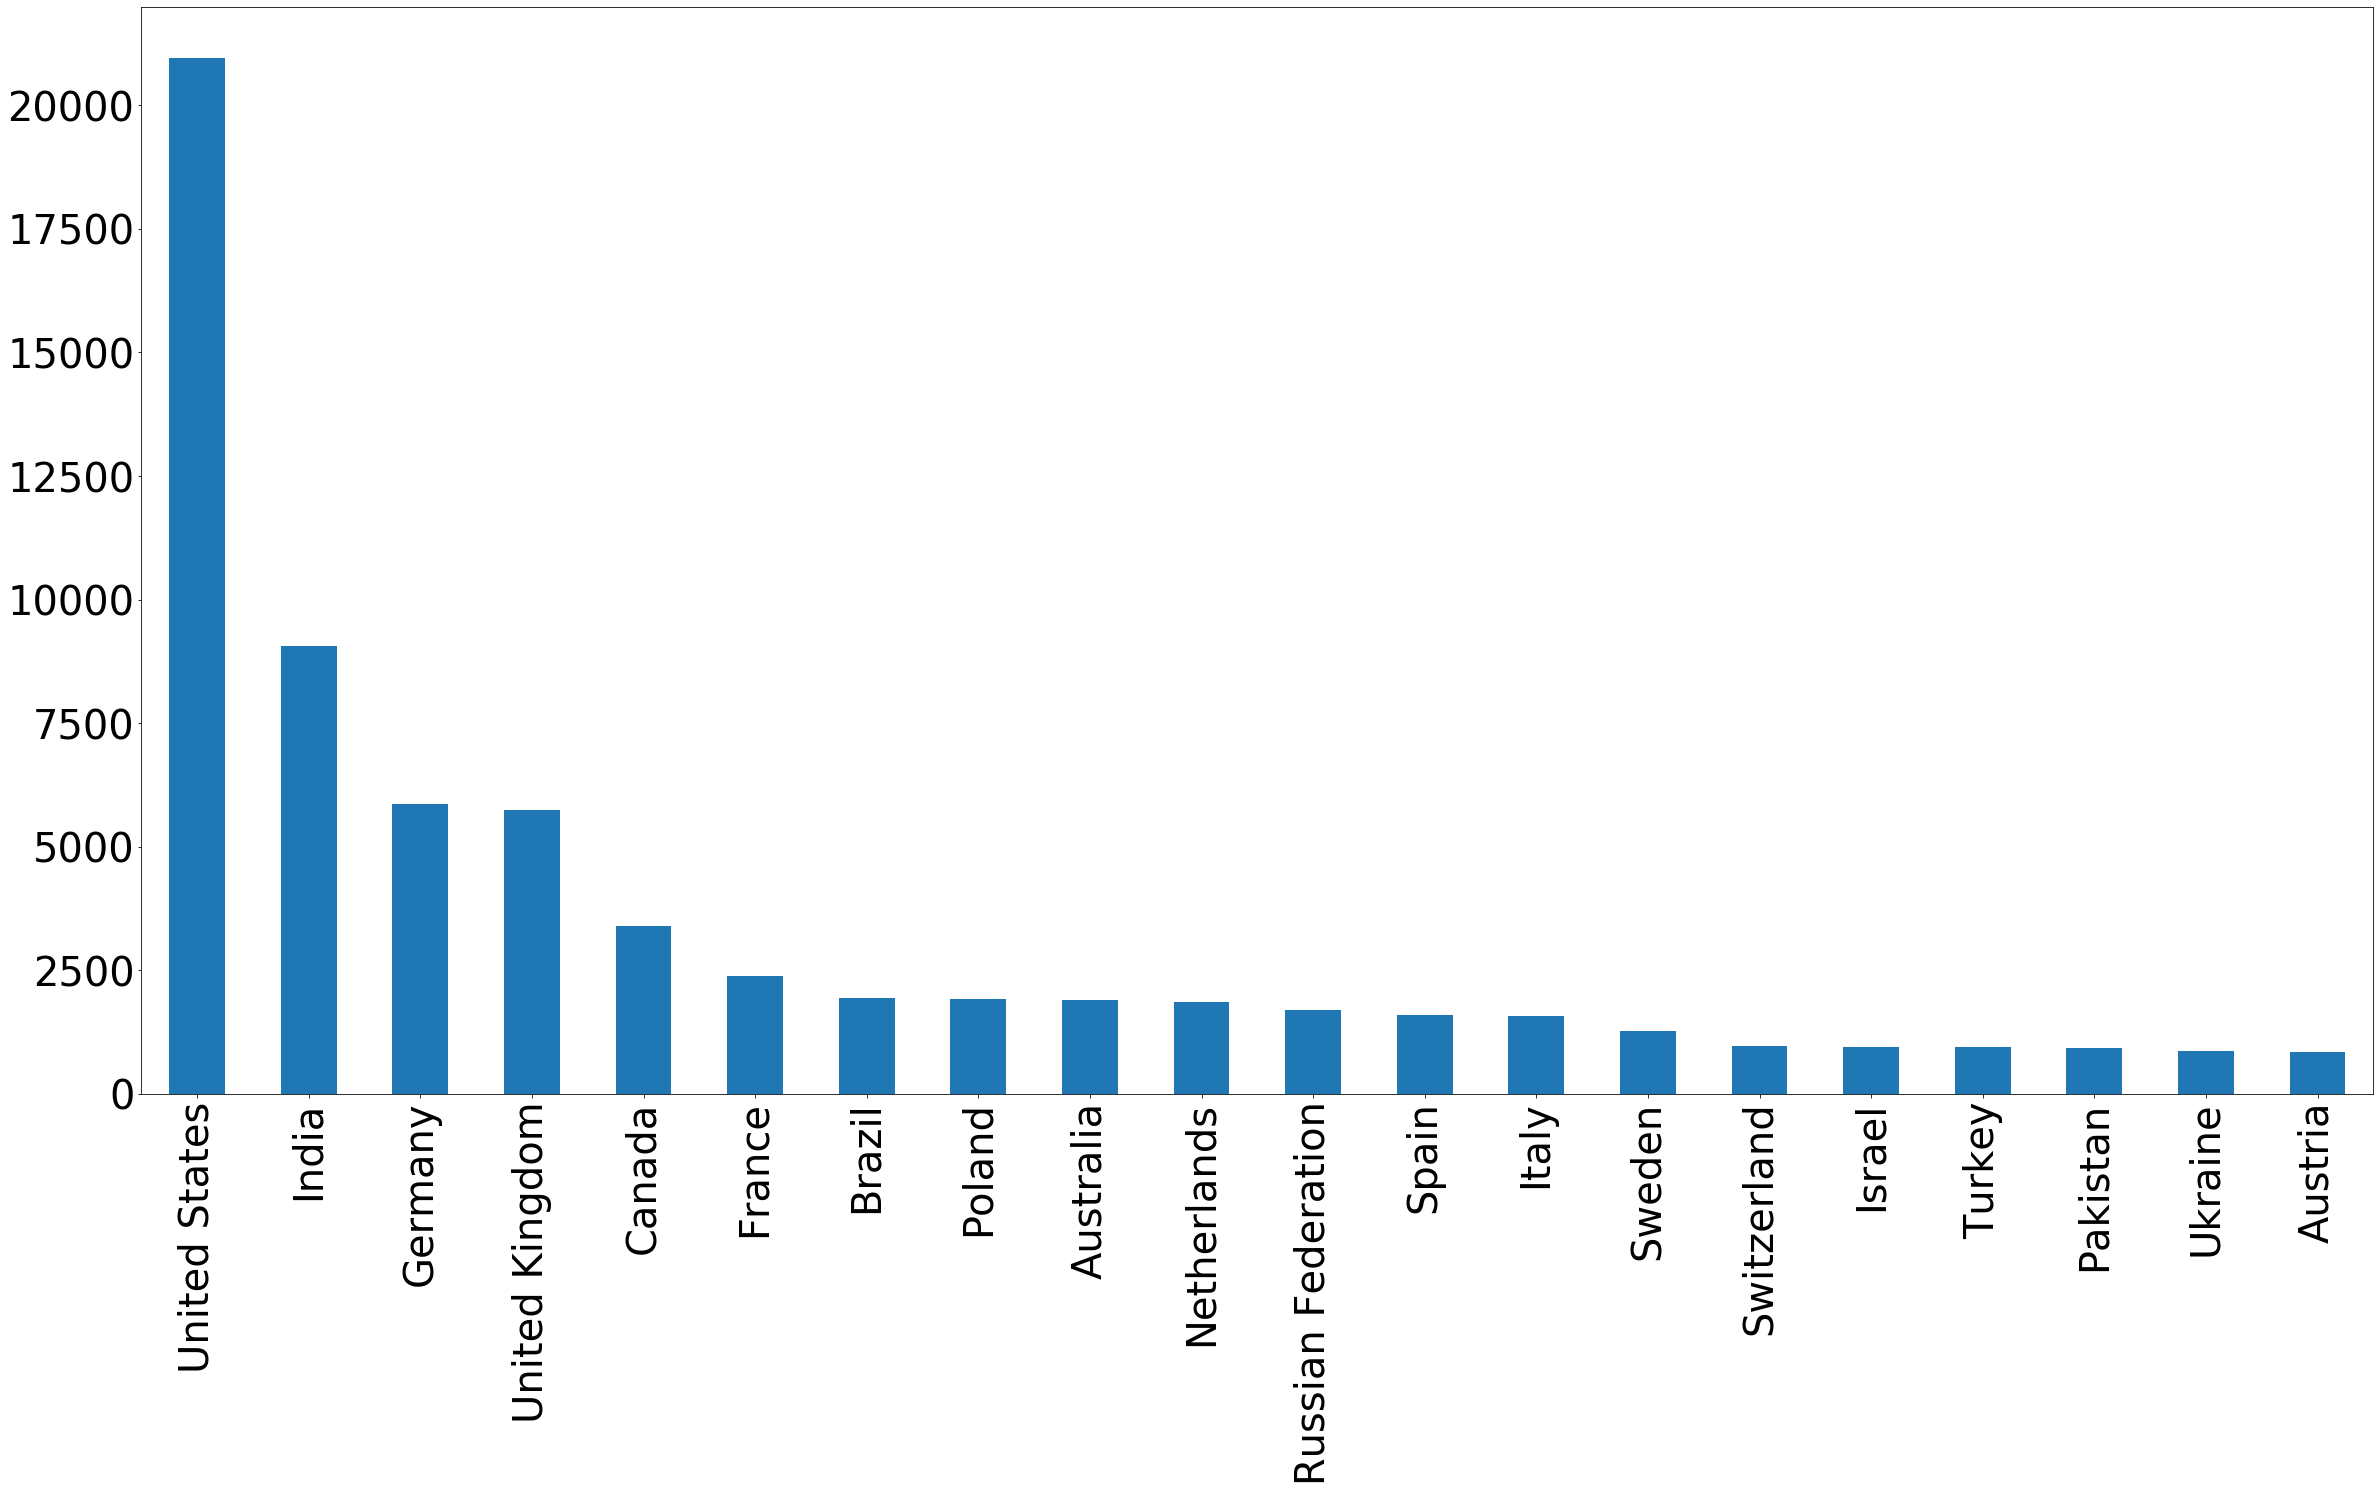

In [891]:
# Question 2 - Where programmers come from in 2019
q2_19 = df_19[['Country']]
q2_19['Country'].value_counts()[:20].plot(kind='bar')

## Evalutation 2019

In the 2019, a large part of programmers come from USA, India, Germany, UK, and Canada.

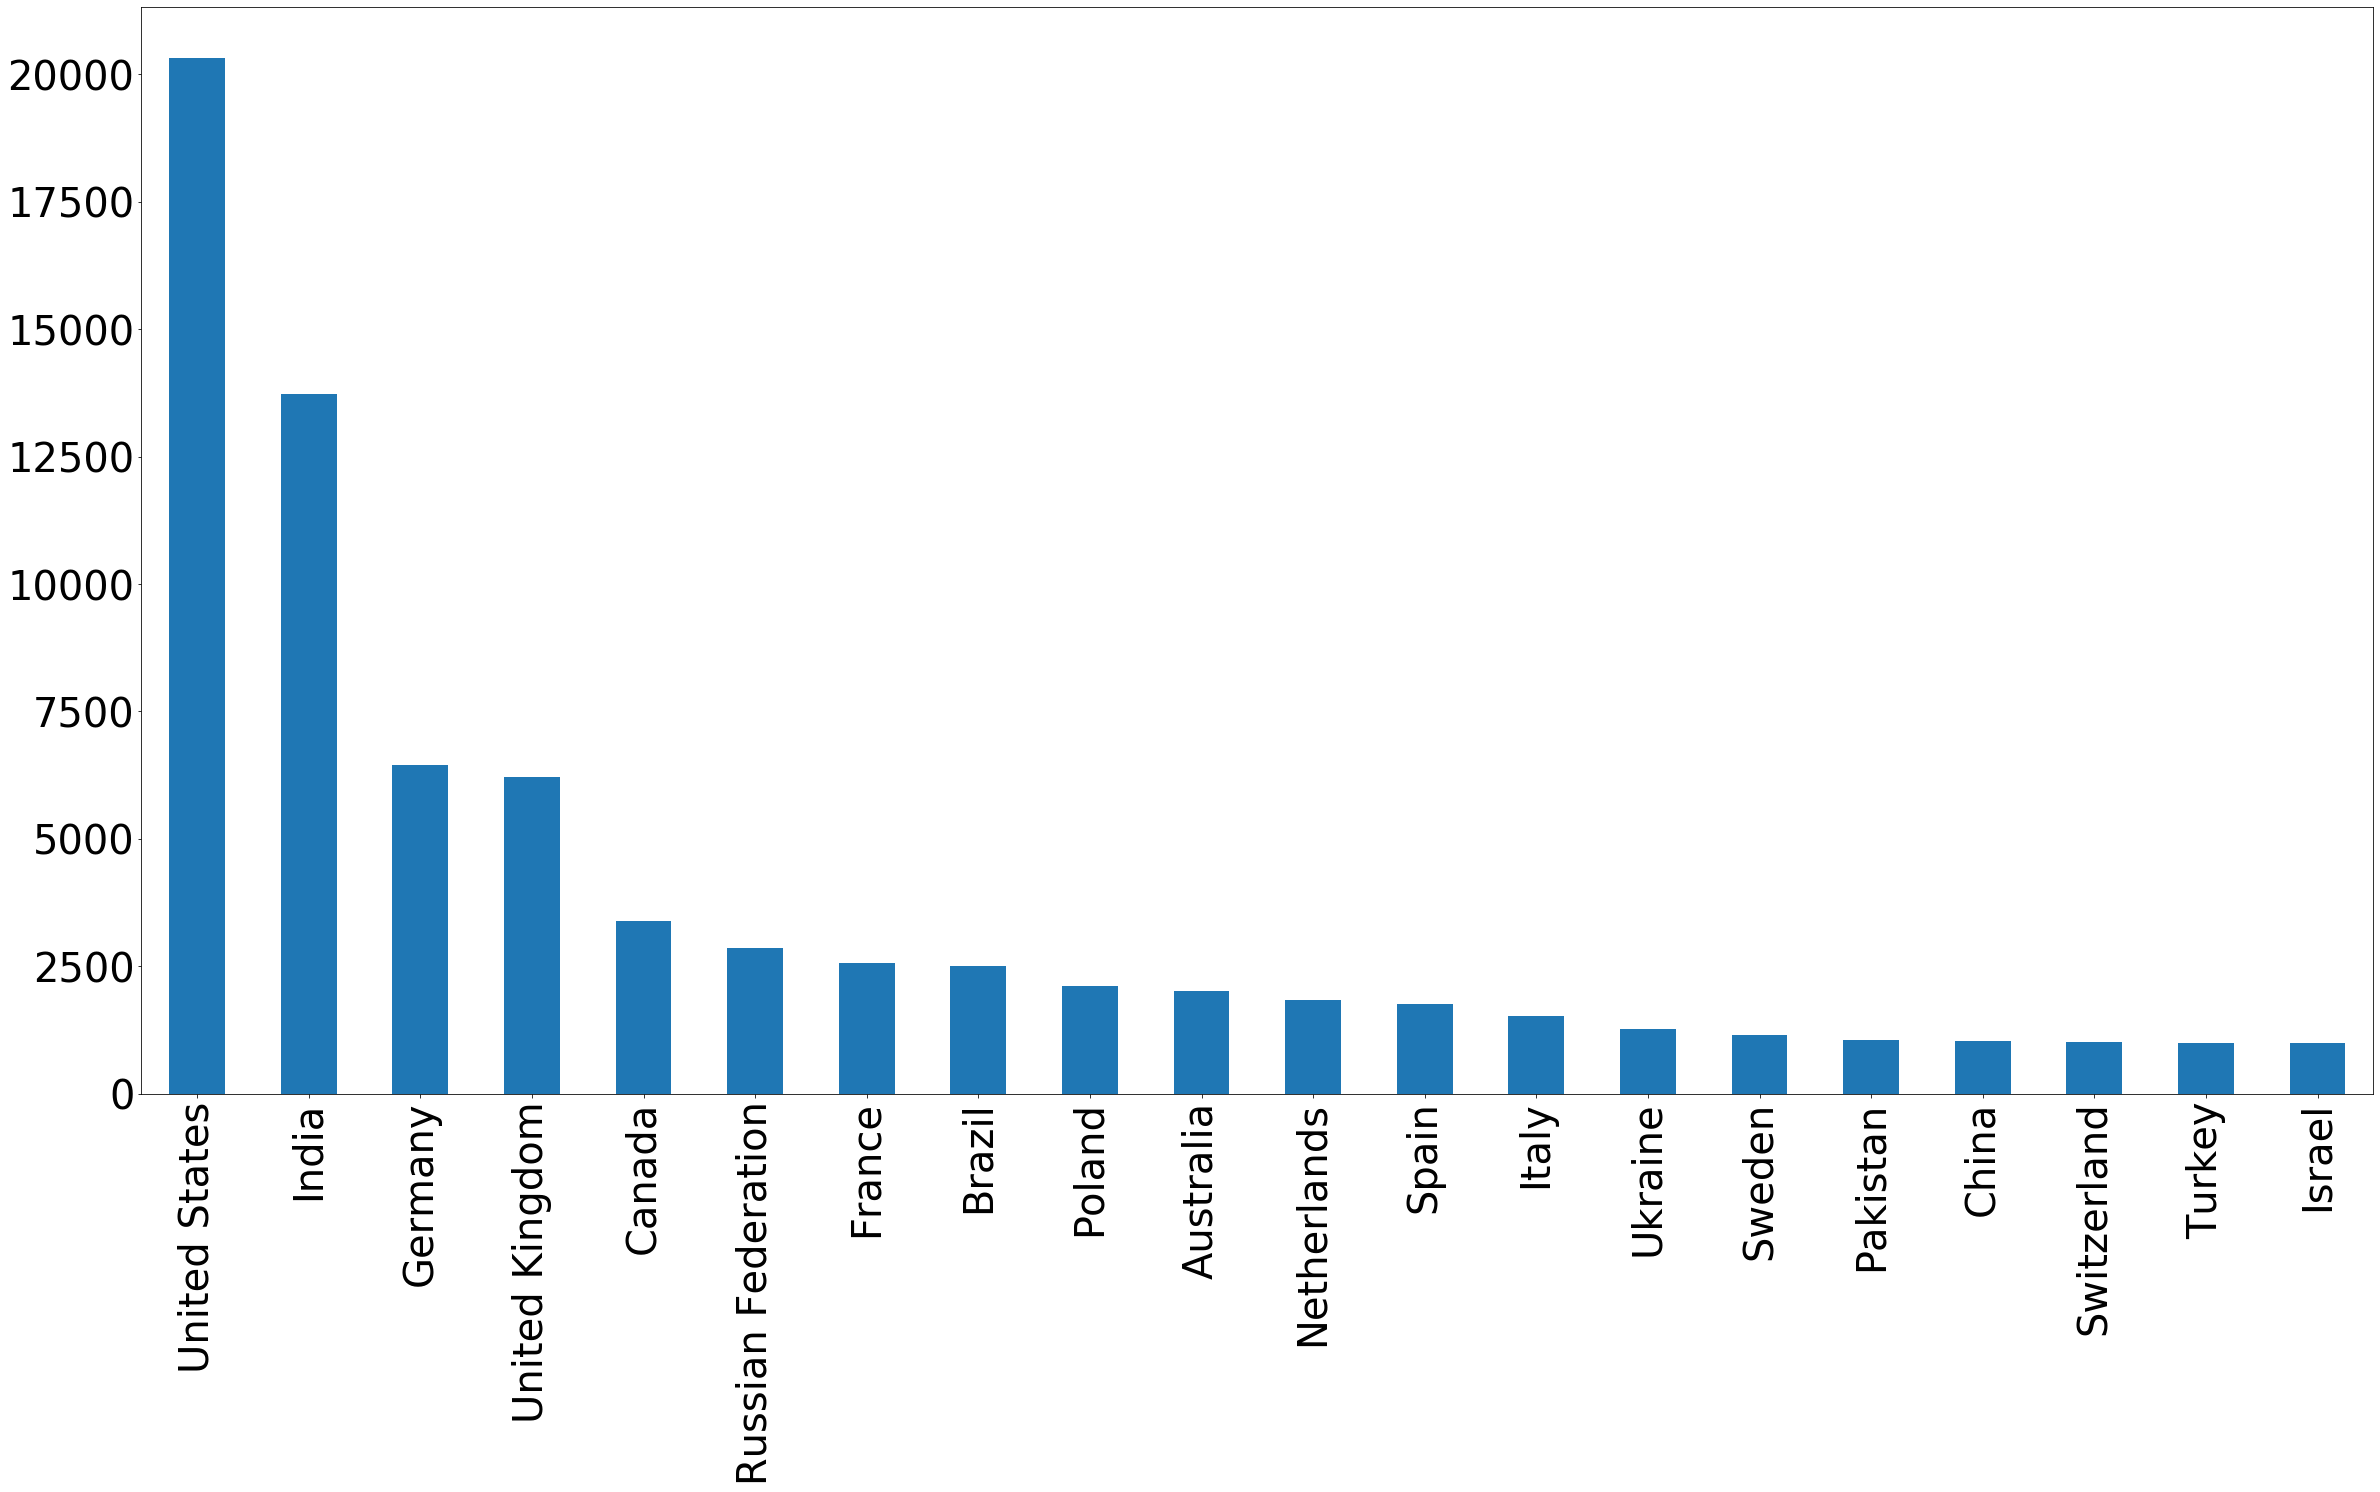

In [892]:
# Question 2 - Where programmers come from in 2018
q2_18 = df_18[['Country']]
q2_18['Country'].value_counts()[:20].plot(kind = 'bar')

## Evalutation 2018

In the 2018, a large part of programmers come from USA, India, Germany, UK, and Canada.

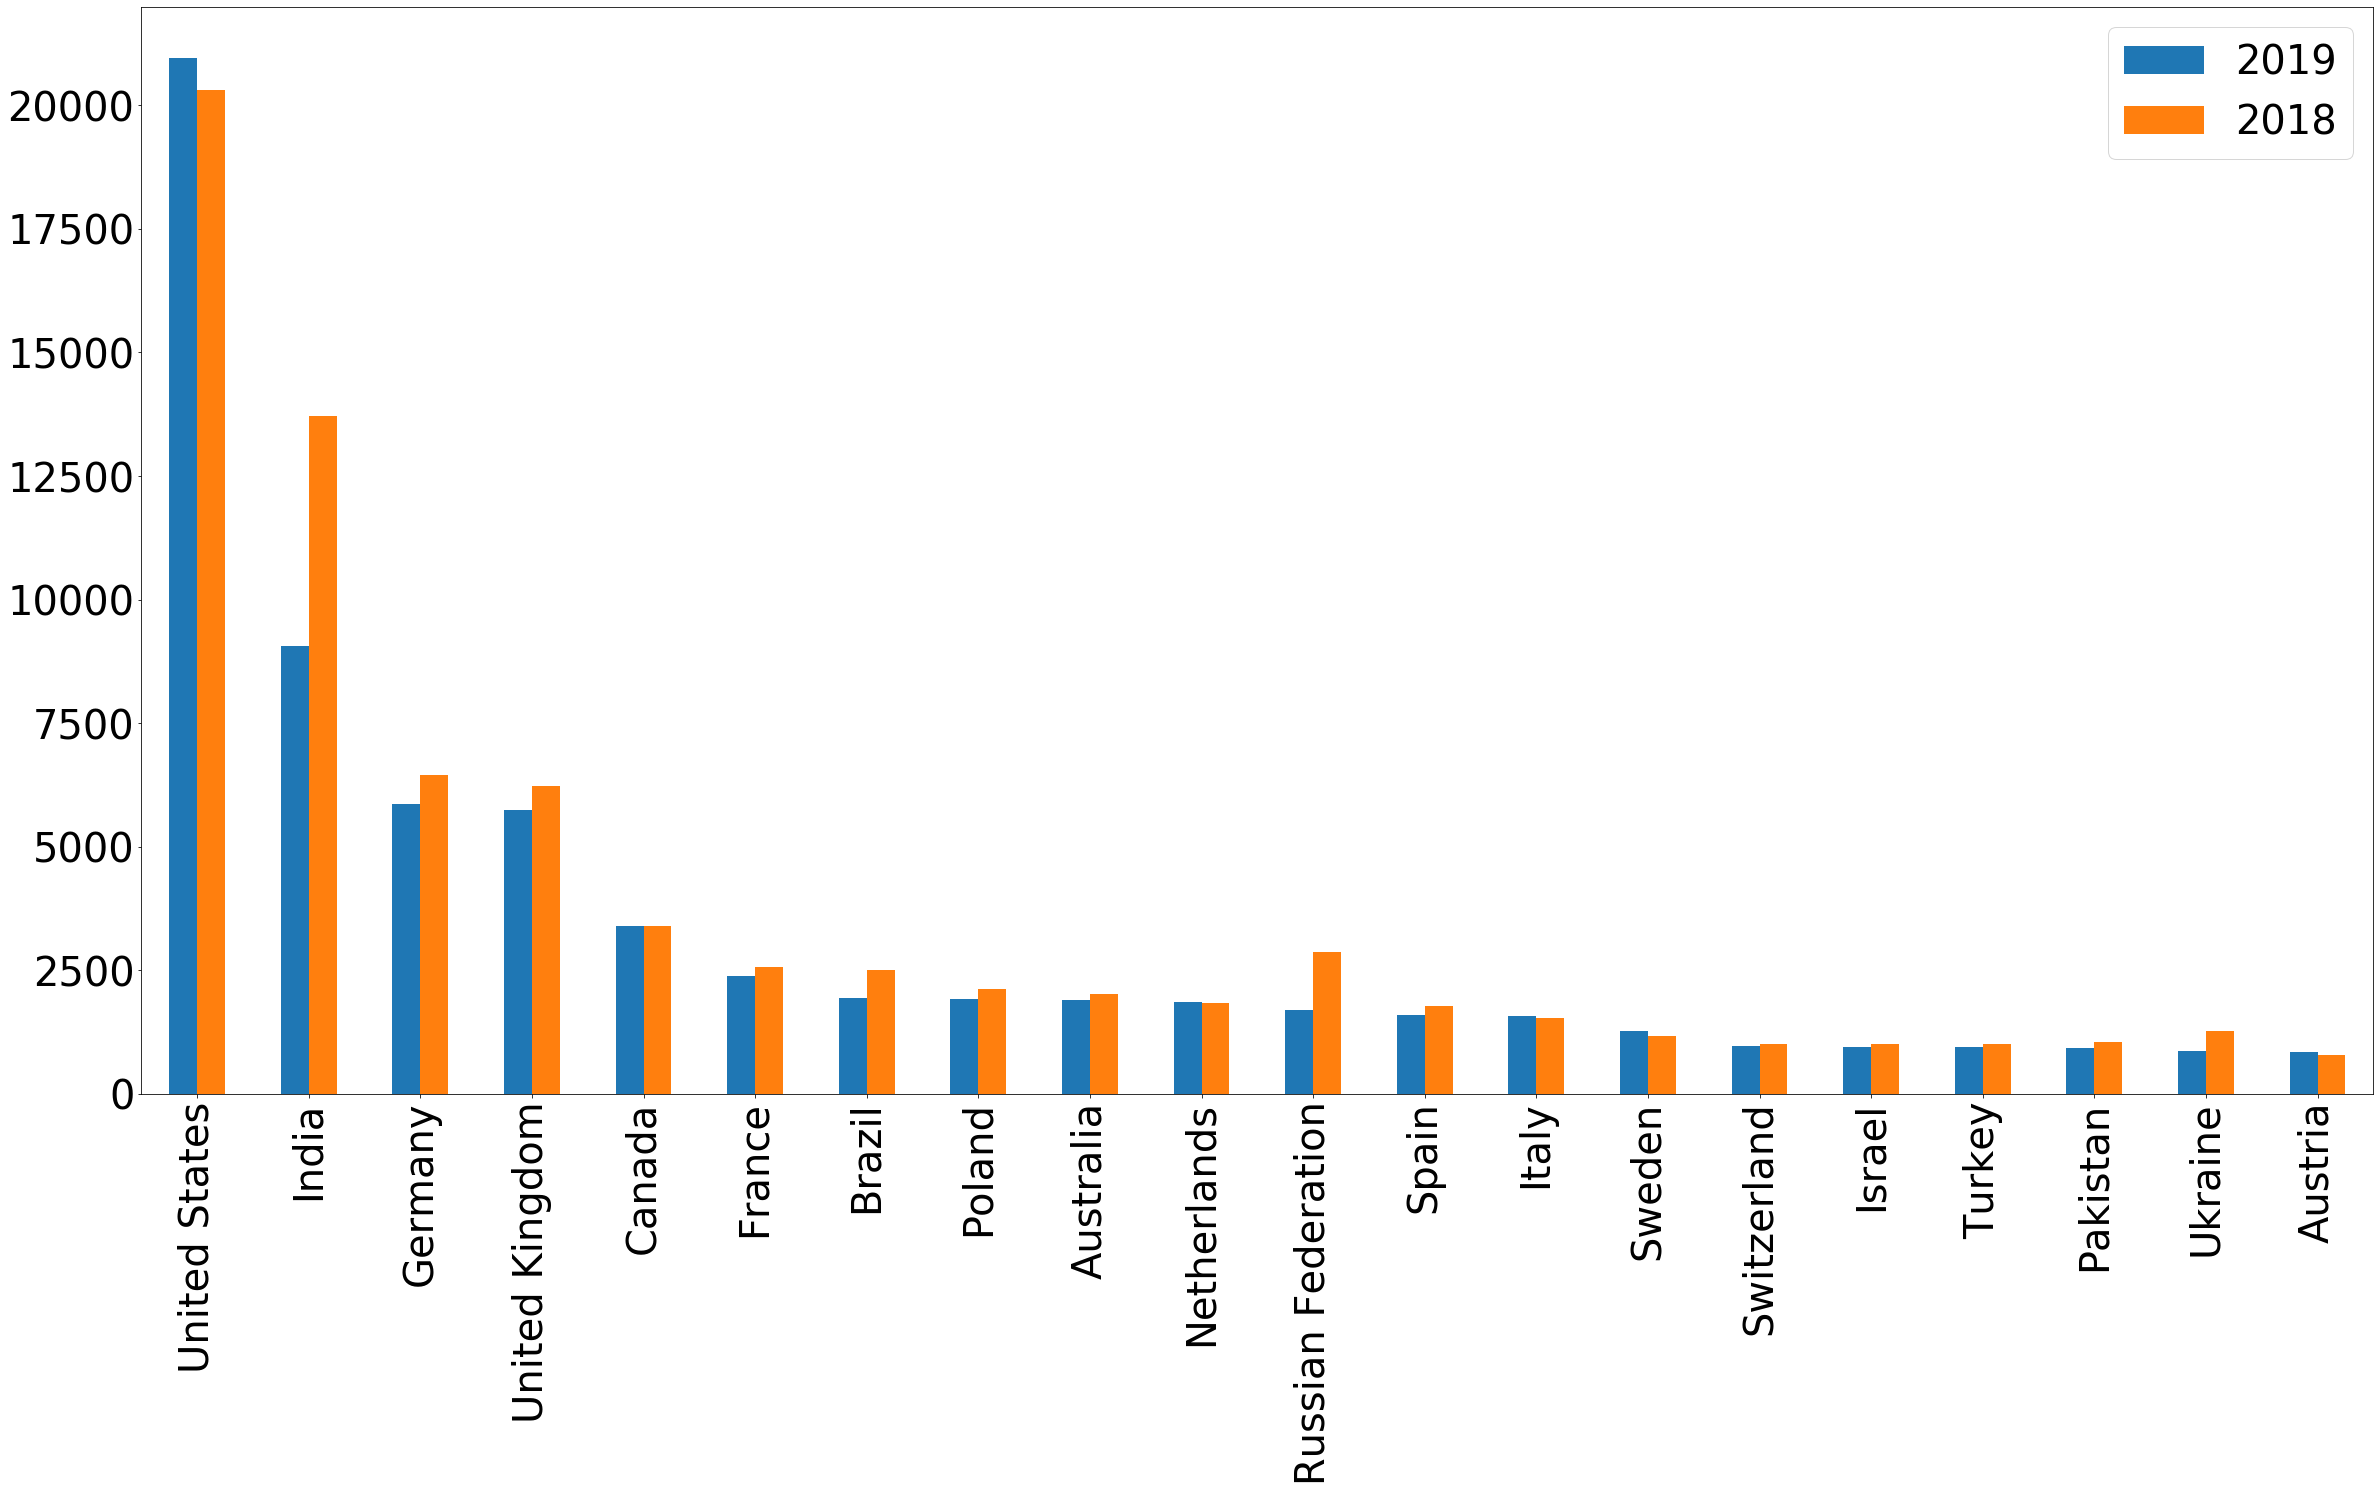

In [899]:
# Question 2 - Comparison between 2019 and 2018
contries_18 = q2_18['Country'].str.split(';', expand = True).stack().value_counts()
contries_19 = q2_19['Country'].str.split(';', expand = True).stack().value_counts()    
df_comparison_coutries = pd.concat([contries_19.combine(contries_19,max).rename('2019').fillna(0), 
                           contries_18.combine(contries_18,max).rename('2018').fillna(0)], axis=1)[:20]
ax = df_comparison_coutries.plot.bar(rot=0)
plt.rcParams['figure.figsize'] = [40, 20]
plt.xticks(rotation='vertical')
plt.rcParams.update({'font.size': 40})

# Evalutation

Between 2019 and 2018, programmers' countries did not change a lot, but there was a remarkable decreasement of indian programmers.

## Question 3

Male                                                 0.910256
Female                                               0.077992
Non-binary, genderqueer, or gender non-conforming    0.011753
dtype: float64

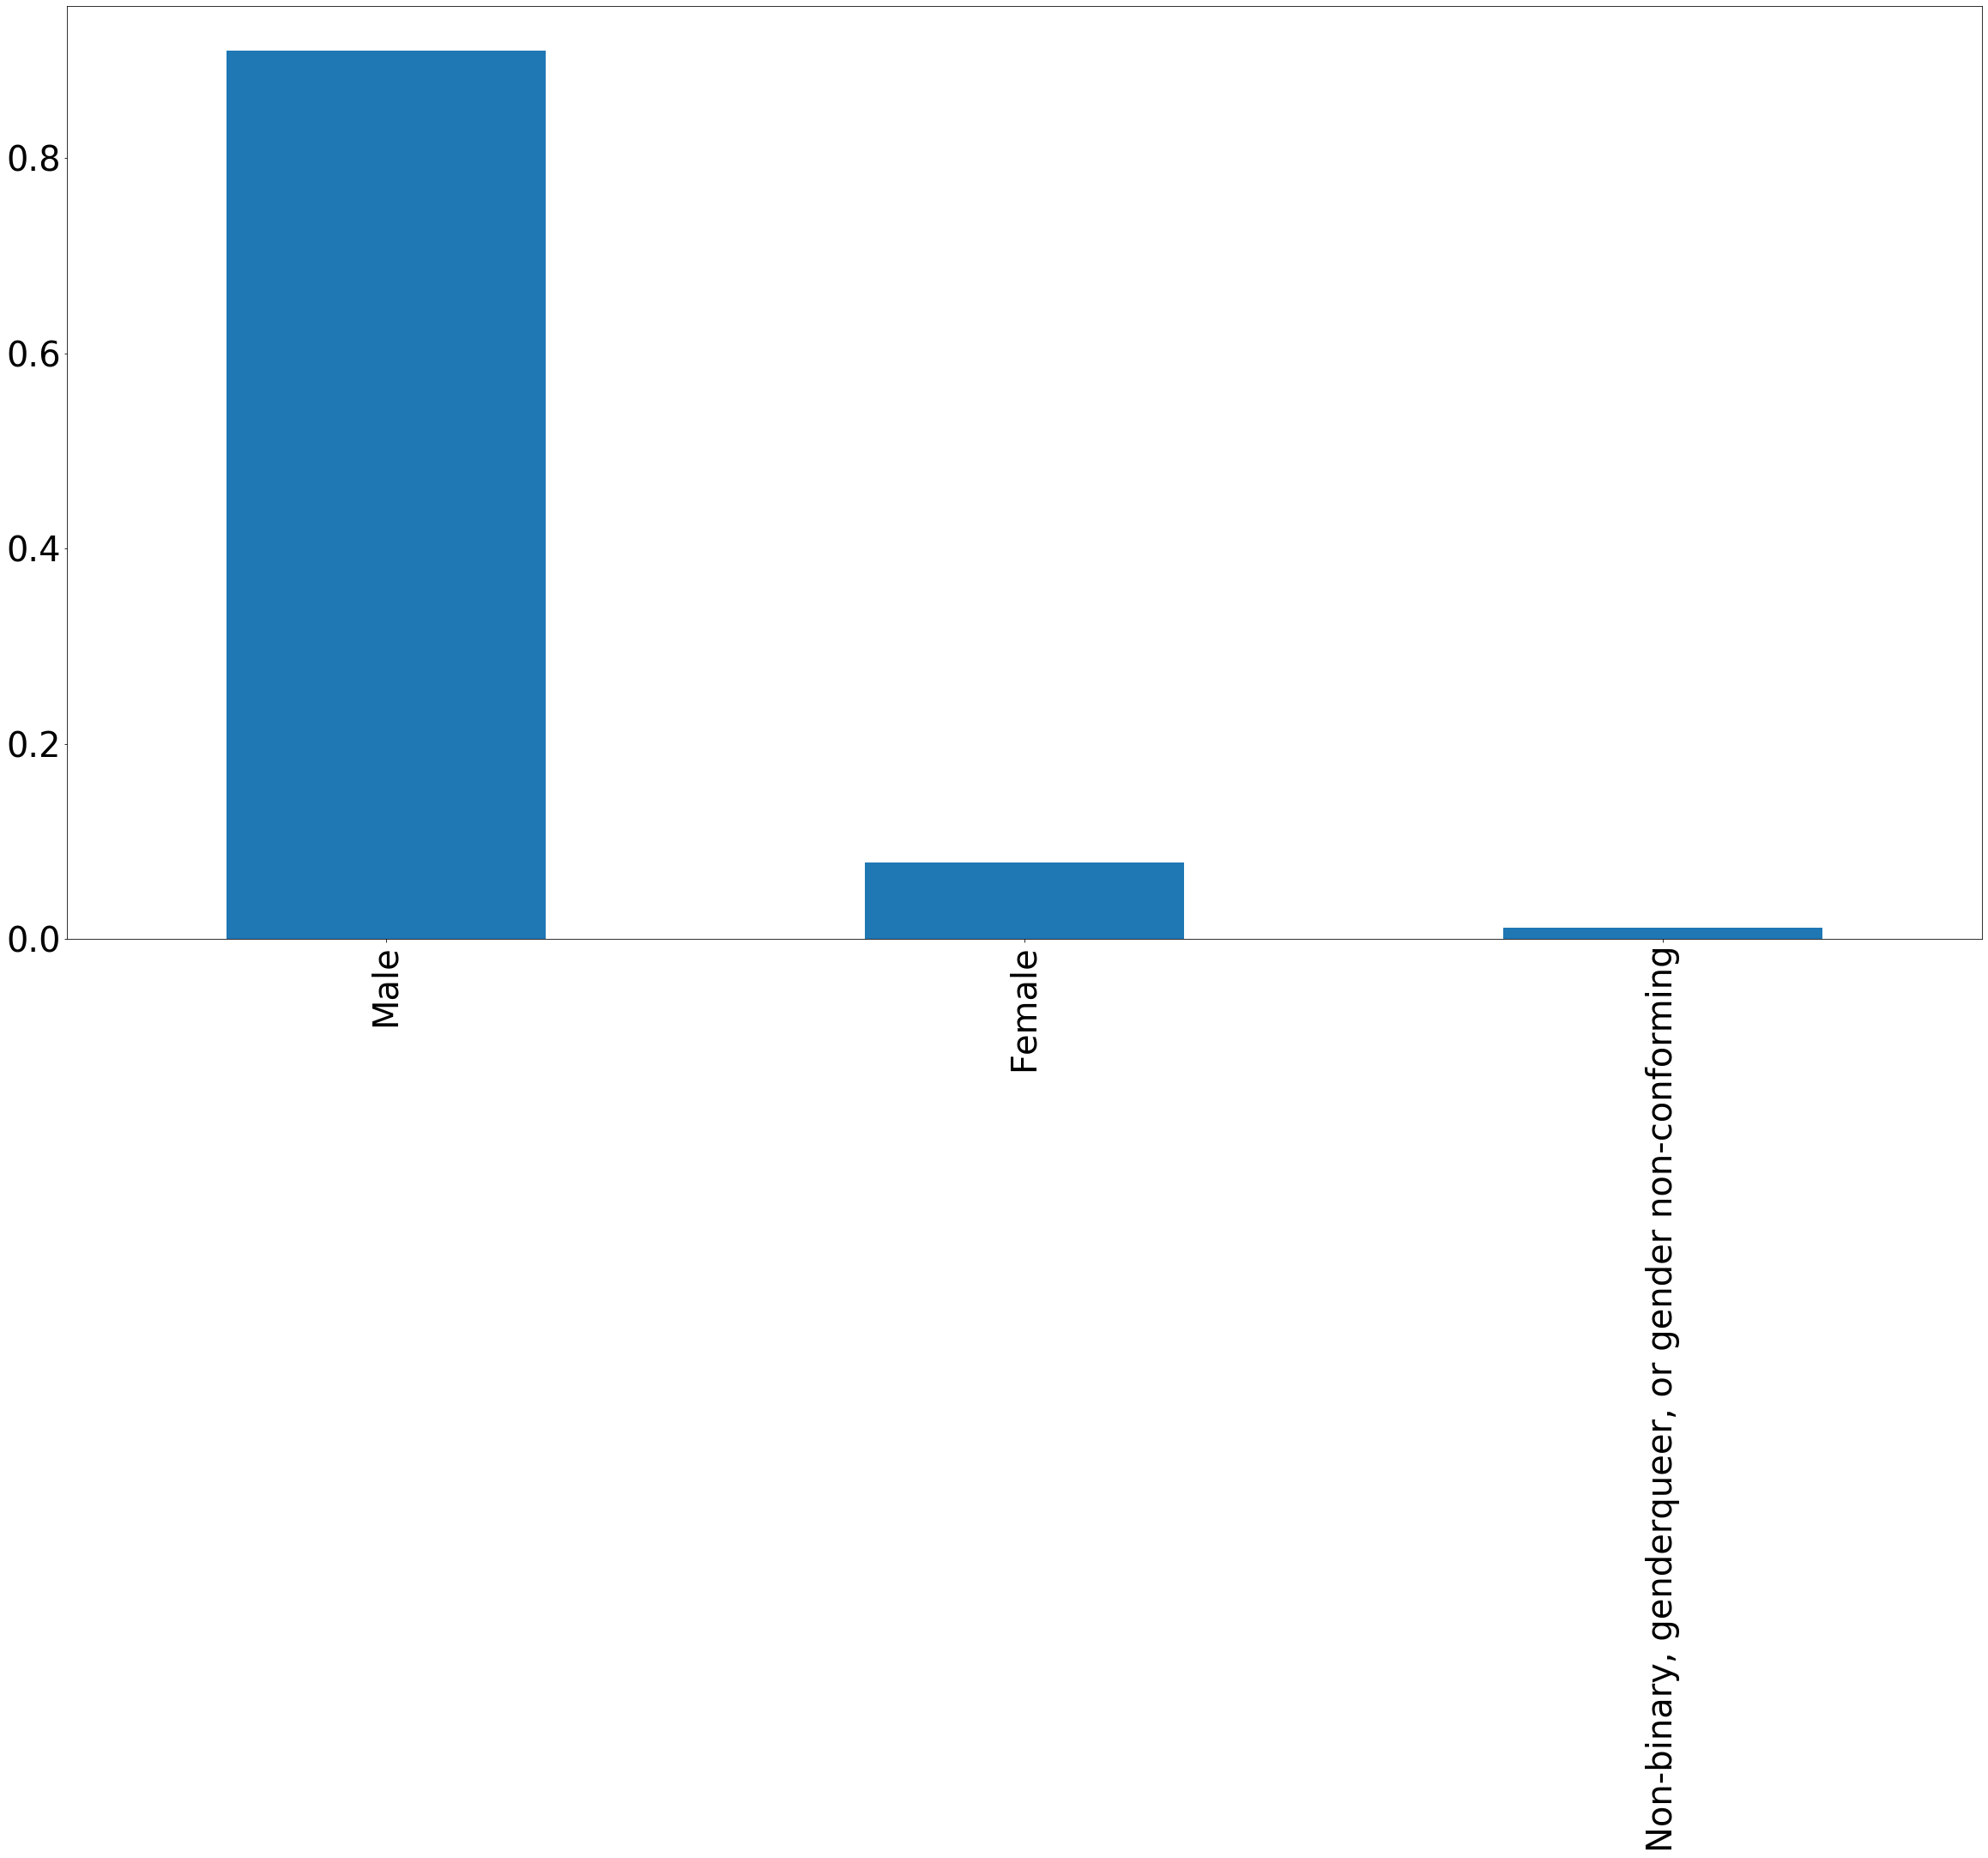

In [914]:
# Question 3 - Are there more male, female or non-binary programmers? in 2019
q3_19 = df_19[['Gender']]
q3_19 = q3_19['Gender'].str.split(';', expand = True).stack()
q3_19 = q3_19.replace({'Man': 'Male', 'Woman': 'Female'})
gender_19 = q3_19.value_counts()
(gender_19/q3_19.shape[0]).plot(kind = 'bar')
gender_19/q3_19.shape[0]

## Evalutation 2019

In 2019 about 91% of Stack Overflow's community is male and the remaining part (Female, Non-binary...) is only 9%.

Male                                                 0.927345
Female                                               0.068389
Non-binary, genderqueer, or gender non-conforming    0.009229
Transgender                                          0.006561
dtype: float64

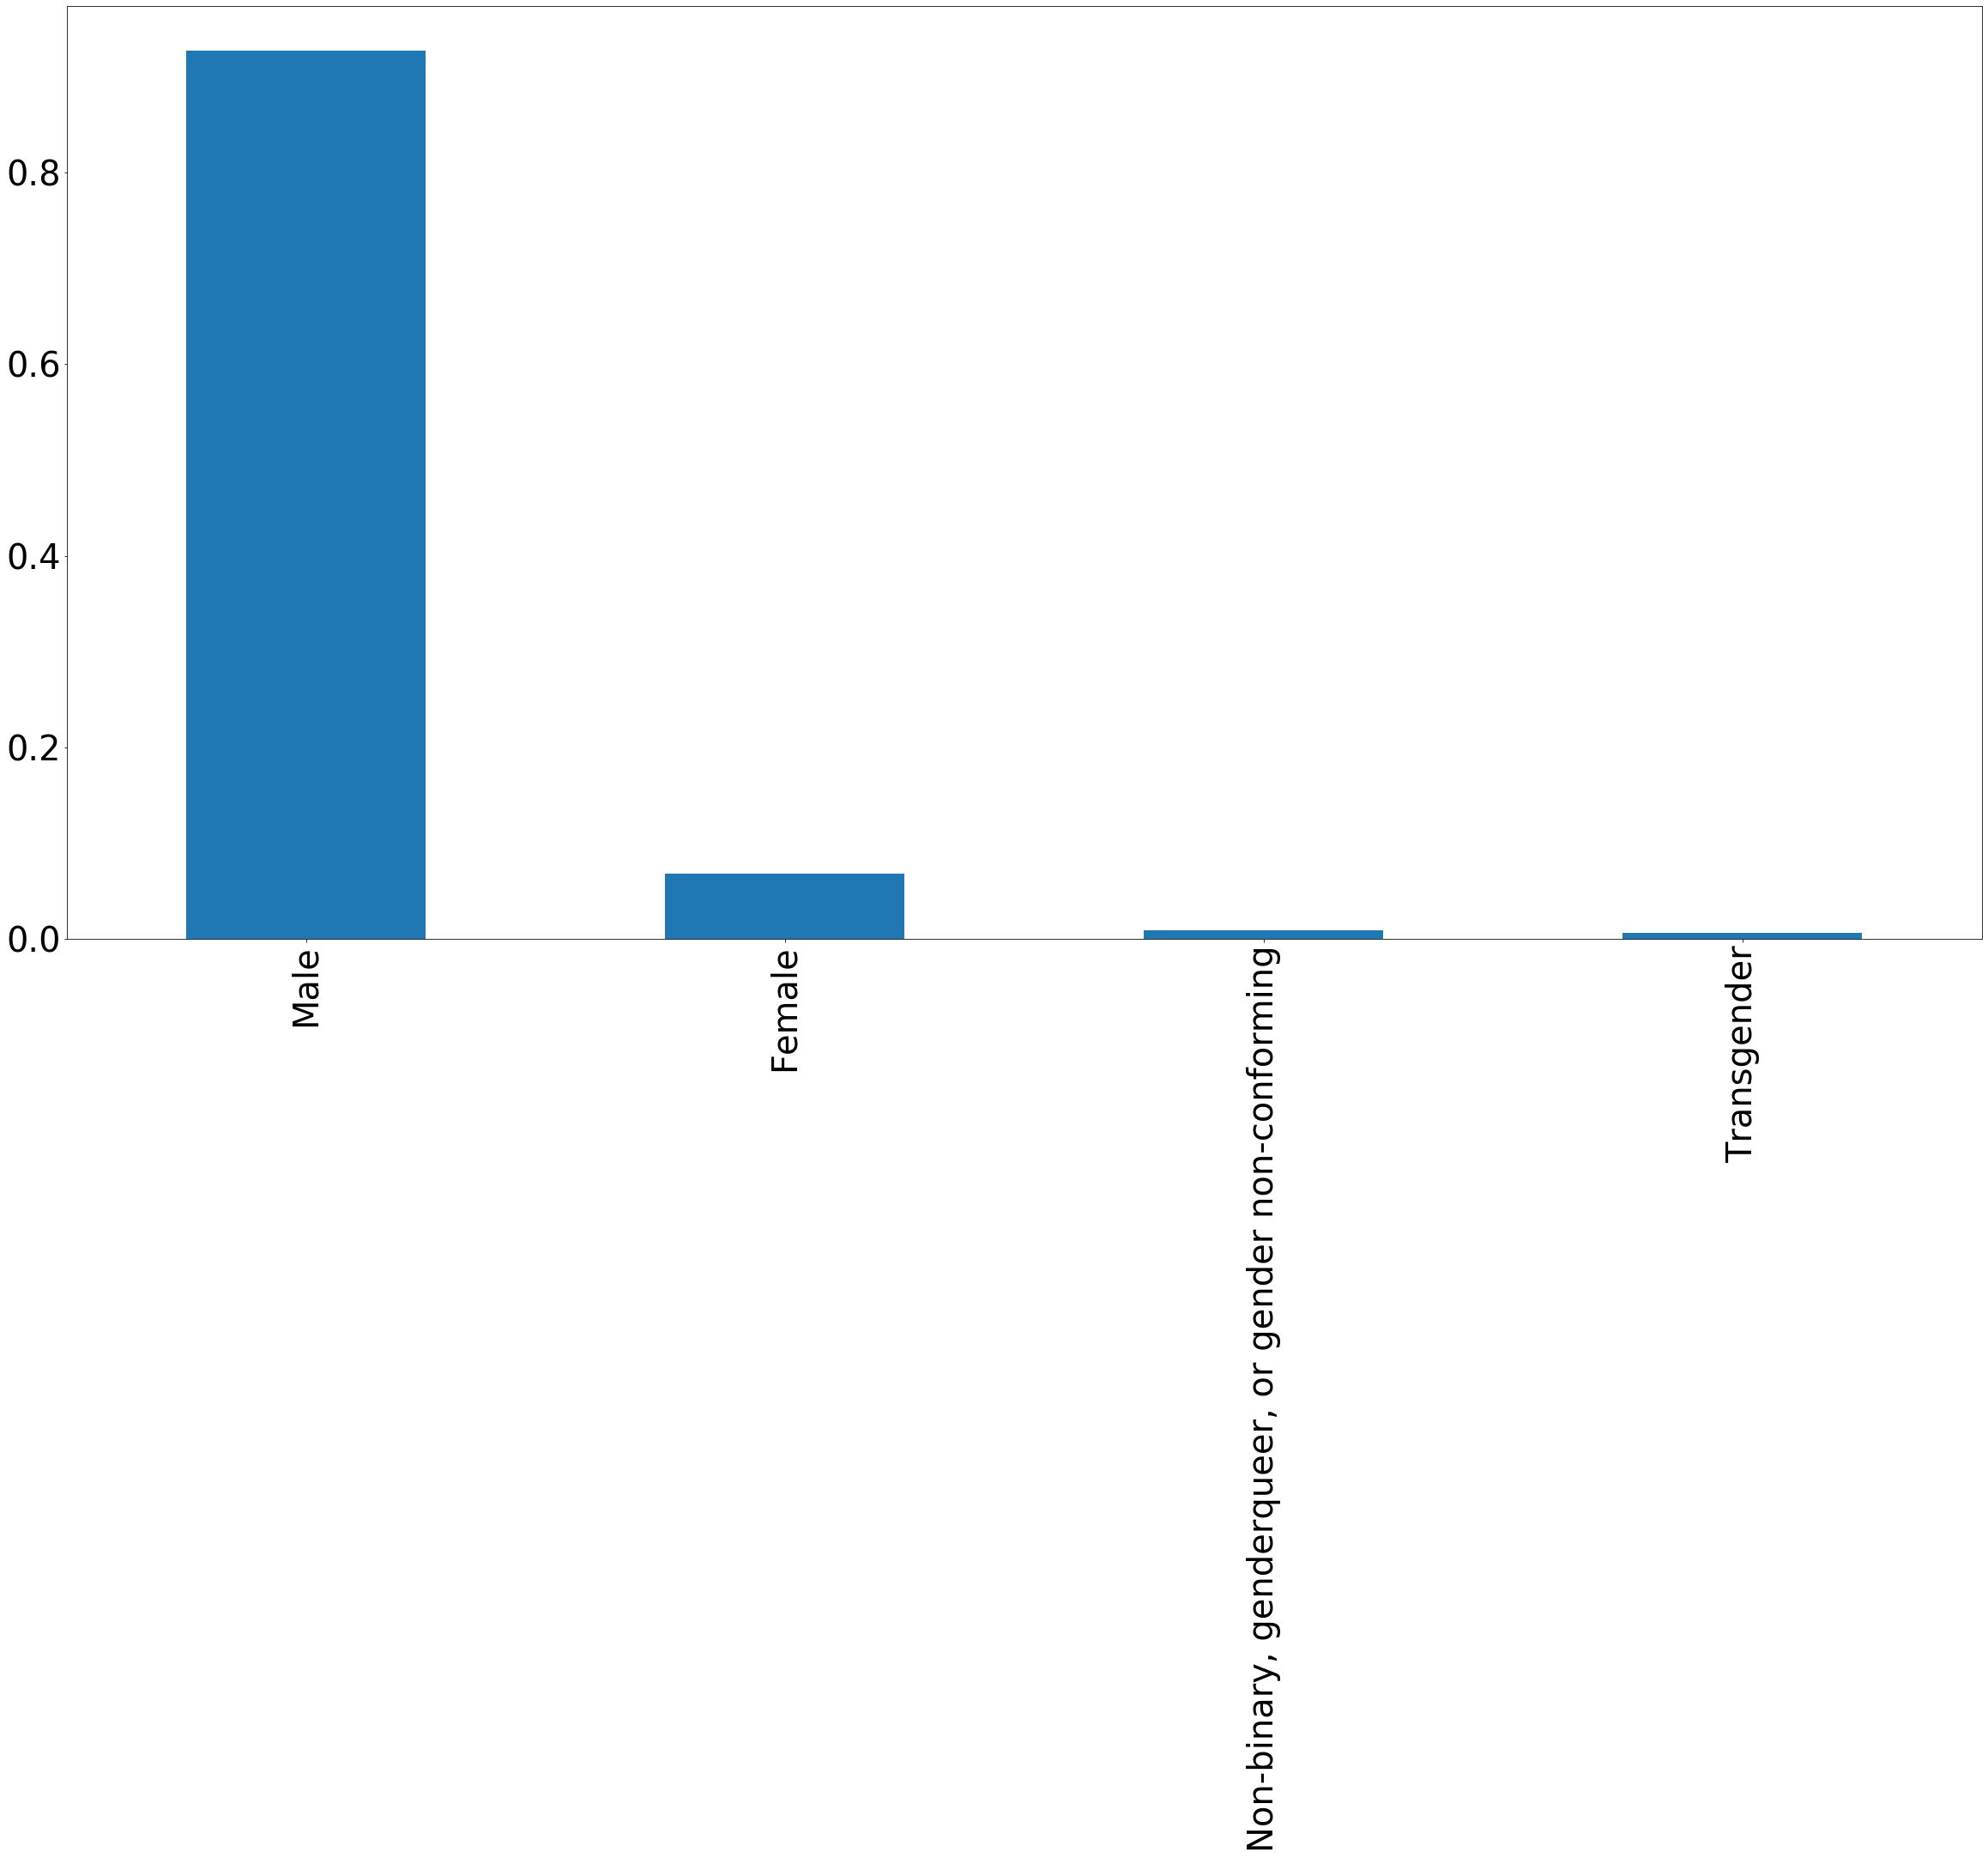

In [922]:
# Question 3 - Are there more male, female or non-binary programmers? in 2018
q3_18 = df_18[['Gender']]
q3_18 = q3_18.dropna(subset=['Gender'], axis = 0)
q3_18['Gender'].value_counts()
gender_18 = q3_18['Gender'].str.split(';', expand = True).stack().value_counts()
(gender_18/np.sum(q3_18['Gender'].value_counts())).plot(kind = 'bar')
gender_18/q3_18.shape[0]

## Evalutation 2018

In 2018 about 92% of Stack Overflow's community is male and the remaining part (Female, Non-binary...) is only 8%.

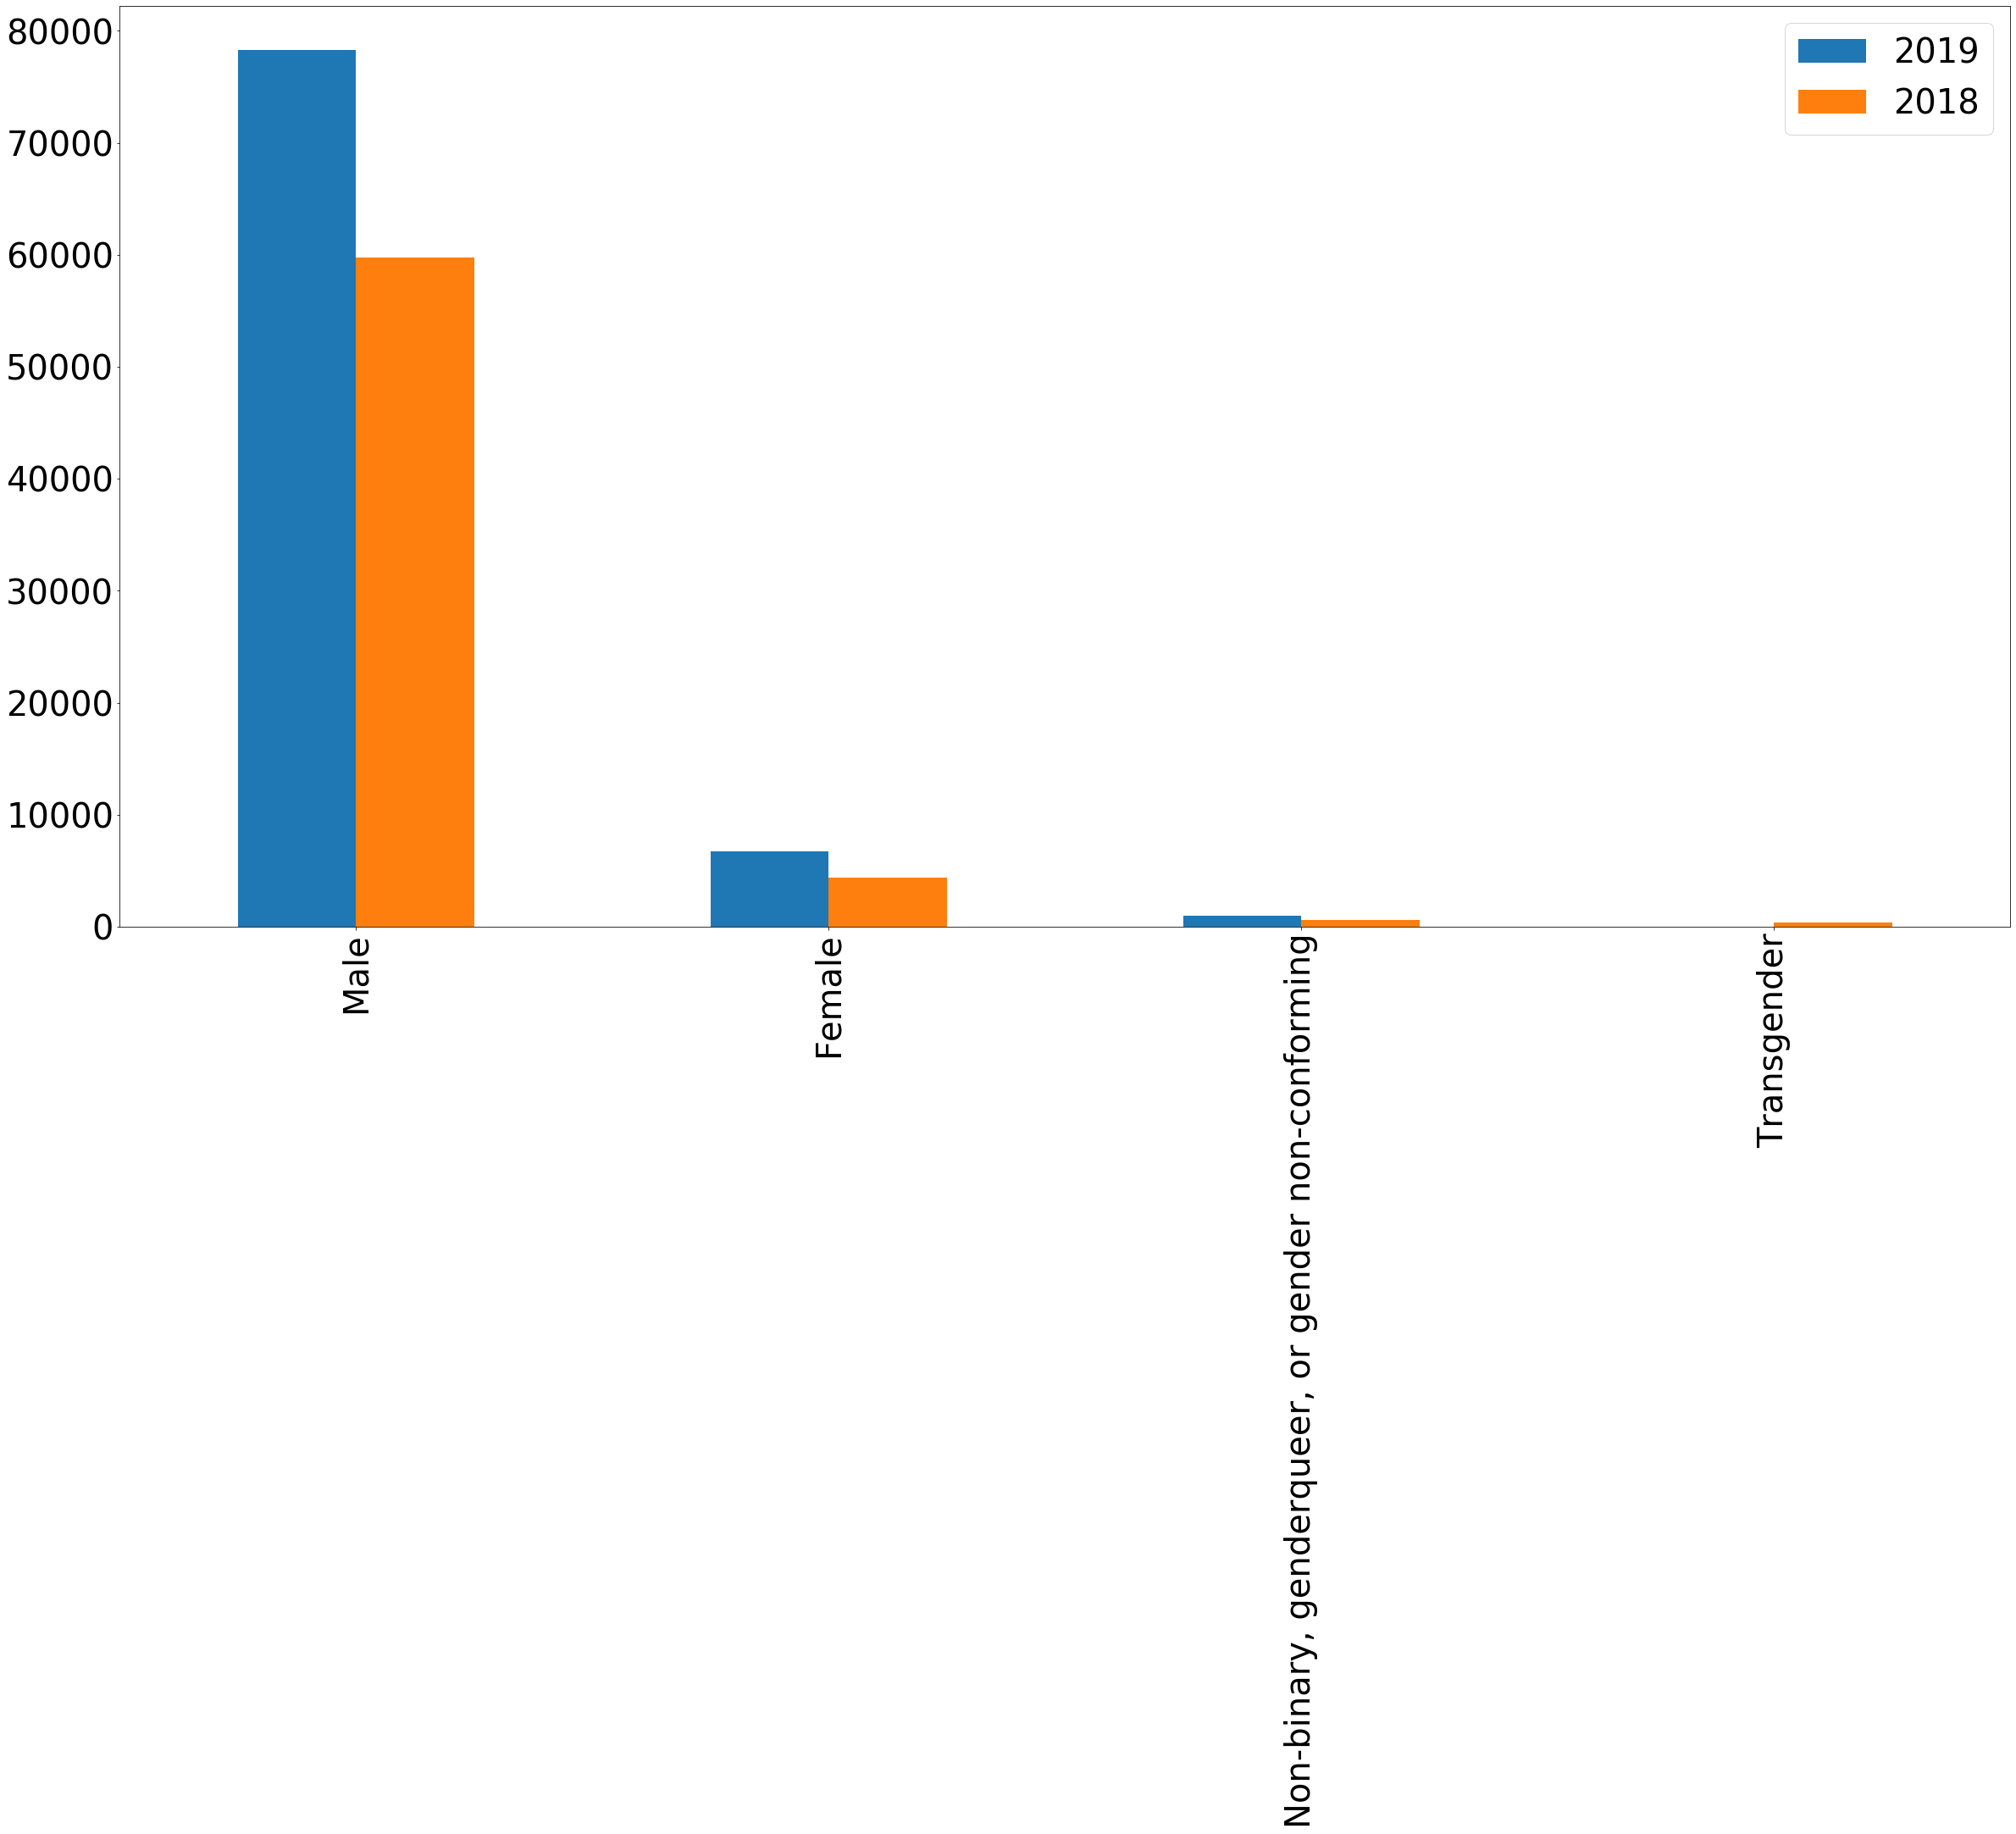

In [896]:
# Question 3 - Comparison between genders between 2019 and 2018
df_comparison_gender = pd.concat([gender_19.combine(gender_19,max).rename('2019').fillna(0), 
                           gender_18.combine(gender_18,max).rename('2018').fillna(0)], axis=1)[:20]

df_comparison_gender.head()

ax = df_comparison_gender.plot.bar(rot=0)
plt.rcParams['figure.figsize'] = [40, 20]
plt.xticks(rotation='vertical')
plt.rcParams.update({'font.size': 40})

# Evalutation 

Between 2018 and 2019 there was an overall increament of all genders, but male programmers community remains the heighest.